[![image](https://raw.githubusercontent.com/visual-layer/visuallayer/main/imgs/vl_horizontal_logo.png)](https://www.visual-layer.com)

# Face Detection from Videos

[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/visual-layer/fastdup/blob/main/examples/video-face-detection.ipynb)
[![Open in Kaggle](https://kaggle.com/static/images/open-in-kaggle.svg)](https://kaggle.com/kernels/welcome?src=https://github.com/visual-layer/fastdup/blob/main/examples/video-face-detection.ipynb)

In this tutorial, we will use fastdup with a face detection model to detect and crop from videos. Following that we analyze the cropped faces for issues such as duplicates, near-duplicates, outliers, bright/dark/blurry faces.

## Installation & Setting Up

In [ ]:
!pip install fastdup kaggle -Uq

In [1]:
import fastdup
fastdup.__version__

/usr/bin/dpkg


'1.27'

## Download & Extract Dataset

Let's download a Tiktok [trending video dataset](https://www.kaggle.com/datasets/erikvdven/tiktok-trending-december-2020) from Kaggle. The dataset consists of the first 1000 trending videos scraped from TikTok on December 2020.

You can download the dataset by manually by heading to the dataset [homepage](https://www.kaggle.com/datasets/erikvdven/tiktok-trending-december-2020) or using the [Kaggle API](https://github.com/Kaggle/kaggle-api). 

Let's use the Kaggle API to download the dataset:

In [ ]:
!kaggle datasets download -d erikvdven/tiktok-trending-december-2020

Unzip the dataset into a folder called `data`.

In [2]:
!unzip -q tiktok-trending-december-2020 -d data

## Video to Images

fastdup works on images. We must first turn the videos into frames of images.

We can use a one-liner fastdup utility function to turn all the videos in a folder into frames:

In [3]:
fastdup.extract_video_frames(input_dir="data", work_dir="frames")

FastDup Software, (C) copyright 2022 Dr. Amir Alush and Dr. Danny Bickson.
2023-07-19 17:23:27 [INFO] Going to loop over dir data
2023-07-19 17:23:27 [INFO] Found total 1000 videos to run on, 1000 train, 0 test, name list 1000, counter 1000 


0

## Run fastdup

Now that we have the frames of images, let's run fastdup and analyze the frames.

In [4]:
fd = fastdup.create(input_dir='frames')

In [5]:
fd.run(bounding_box='face')

FastDup Software, (C) copyright 2022 Dr. Amir Alush and Dr. Danny Bickson.
2023-07-19 17:23:48 [INFO] Going to loop over dir frames
2023-07-19 17:23:48 [INFO] Found total 4325 images to run on, 4325 train, 0 test, name list 4325, counter 4325 
FastDup Software, (C) copyright 2022 Dr. Amir Alush and Dr. Danny Bickson.utes
2023-07-19 17:25:58 [INFO] Going to loop over dir /tmp/crops_input.csv
2023-07-19 17:25:58 [INFO] Found total 2601 images to run on, 2601 train, 0 test, name list 2601, counter 2601 
2023-07-19 17:26:04 [INFO] Found total 2601 images to run ontimated: 0 Minutes
Finished histogram 0.412
Finished bucket sort 0.421
2023-07-19 17:26:04 [INFO] 74) Finished write_index() NN model
2023-07-19 17:26:04 [INFO] Stored nn model index file work_dir/nnf.index
2023-07-19 17:26:04 [INFO] Total time took 6161 ms
2023-07-19 17:26:04 [INFO] Found a total of 4 fully identical images (d>0.990), which are 0.08 %
2023-07-19 17:26:04 [INFO] Found a total of 26 nearly identical images(d>0.980)

0

## Components Gallery

We can visualize the cluster of similar detections using the components gallery view. Specify `draw_bbox=True` to see the detection bounding box on the original image.

100%|████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 94.44it/s]


Finished OK. Components are stored as image files work_dir/galleries/components_[index].jpg
Stored components visual view in  work_dir/galleries/components.html
Execution time in seconds 0.3



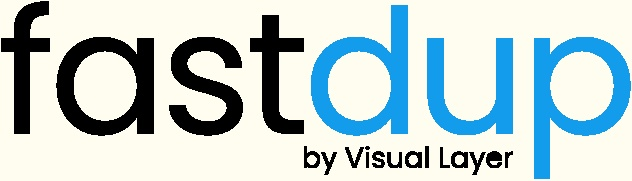
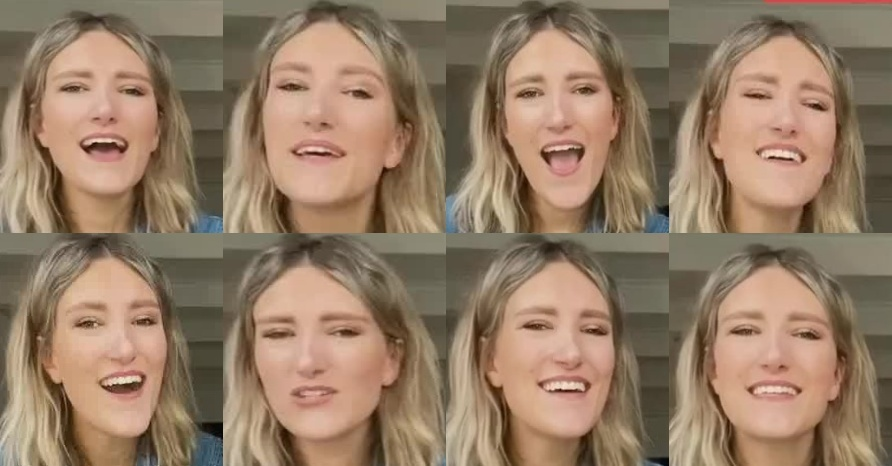
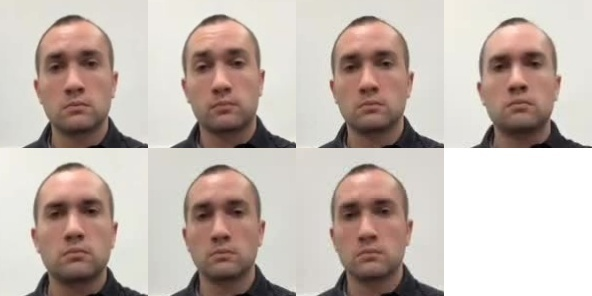
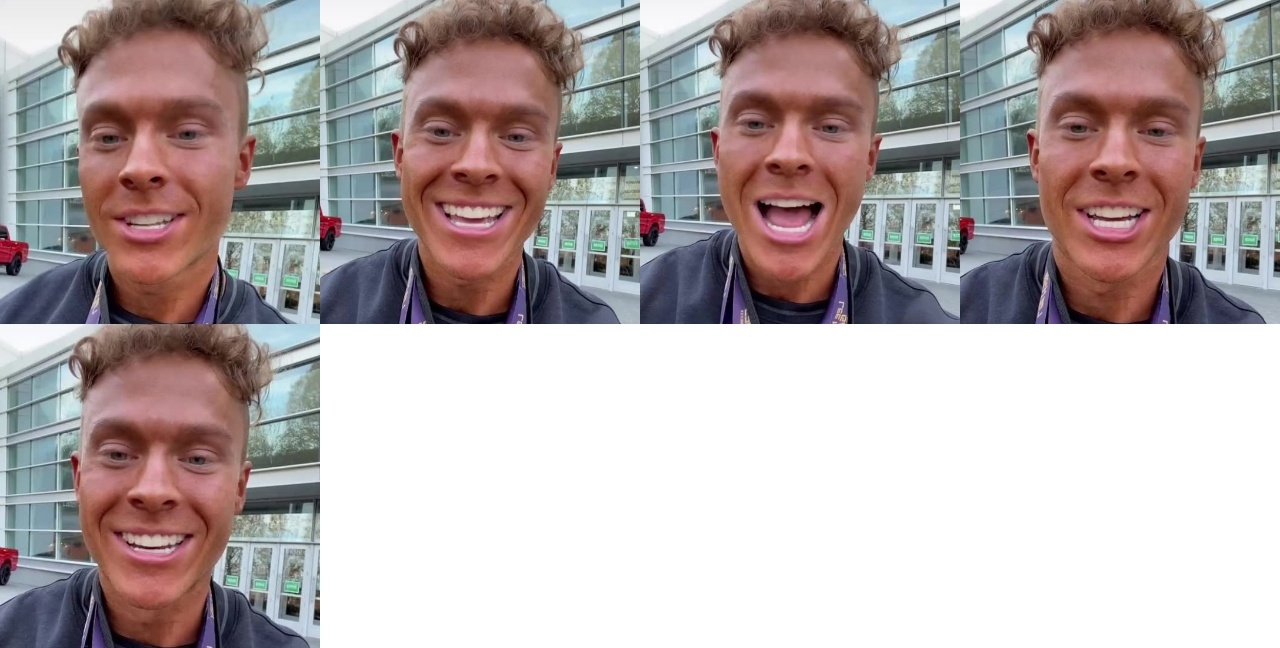
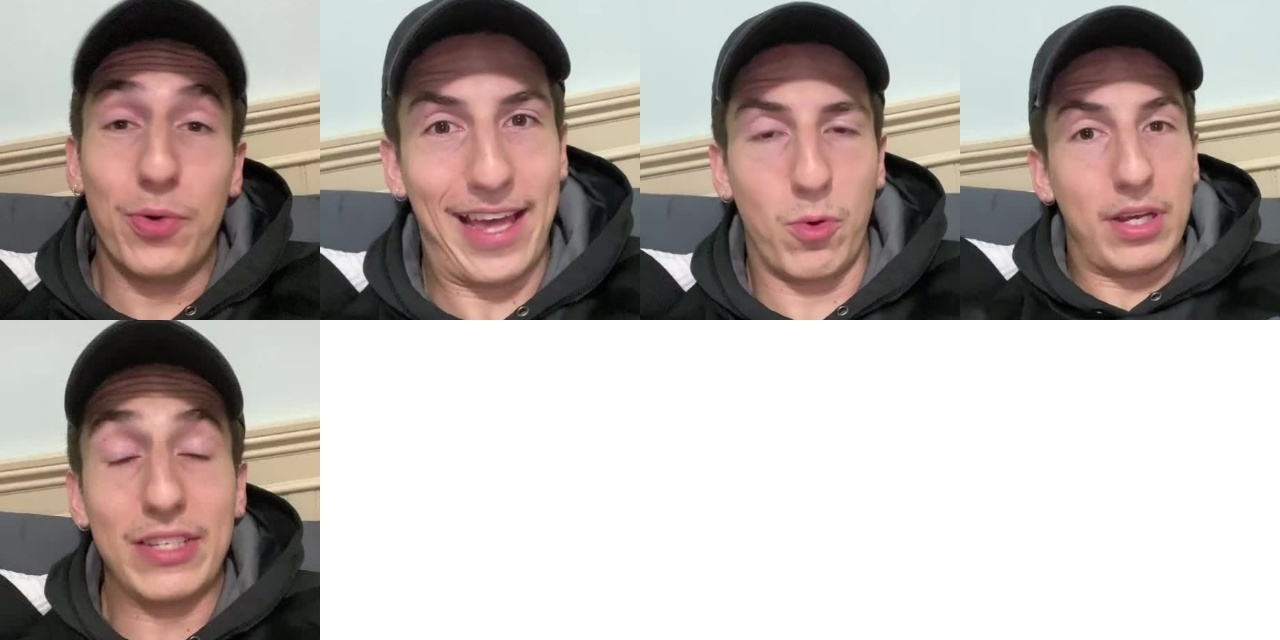
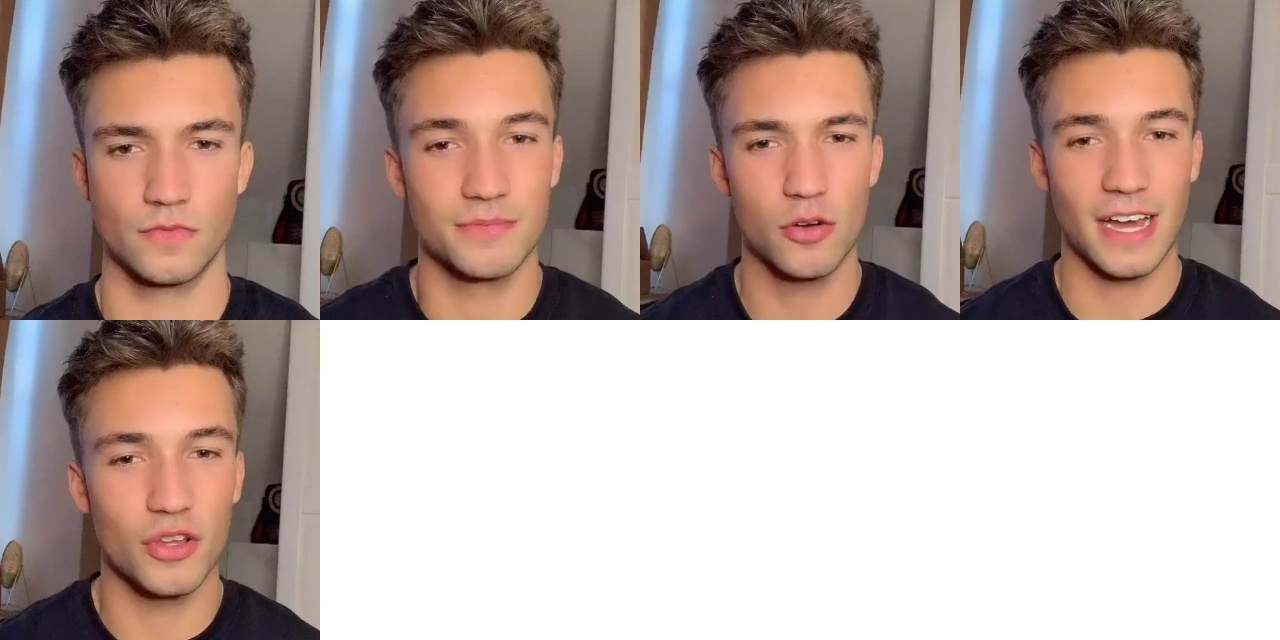
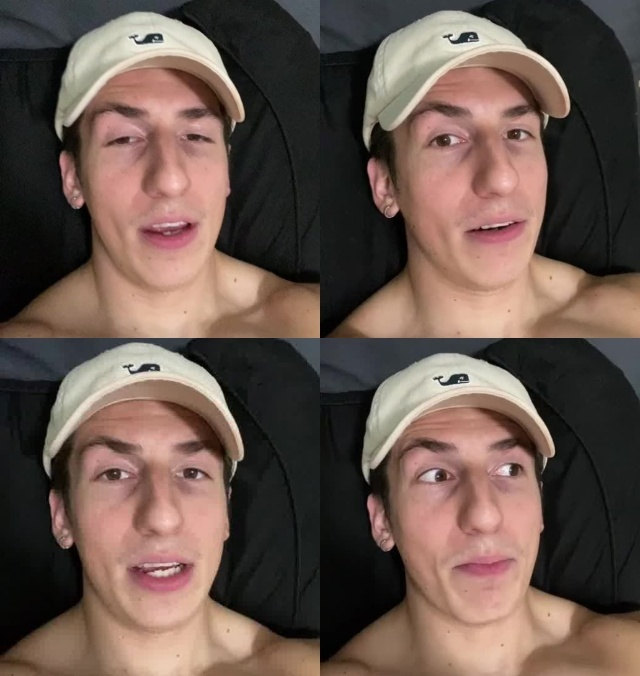
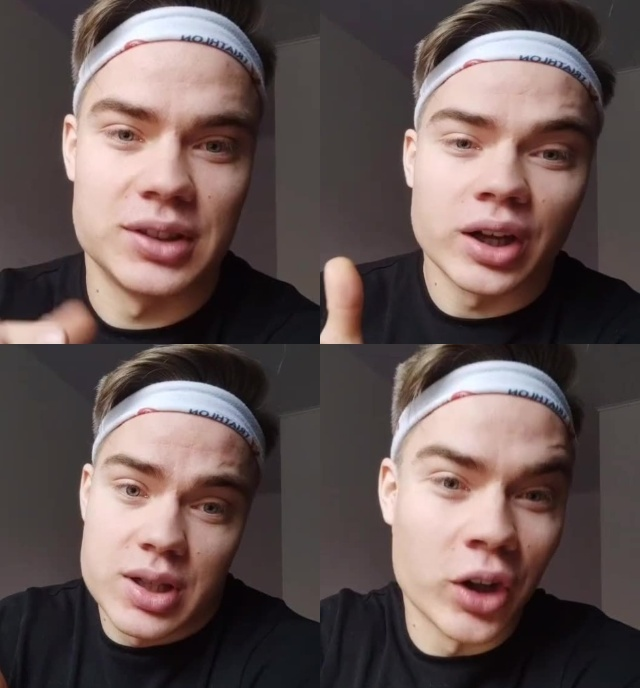
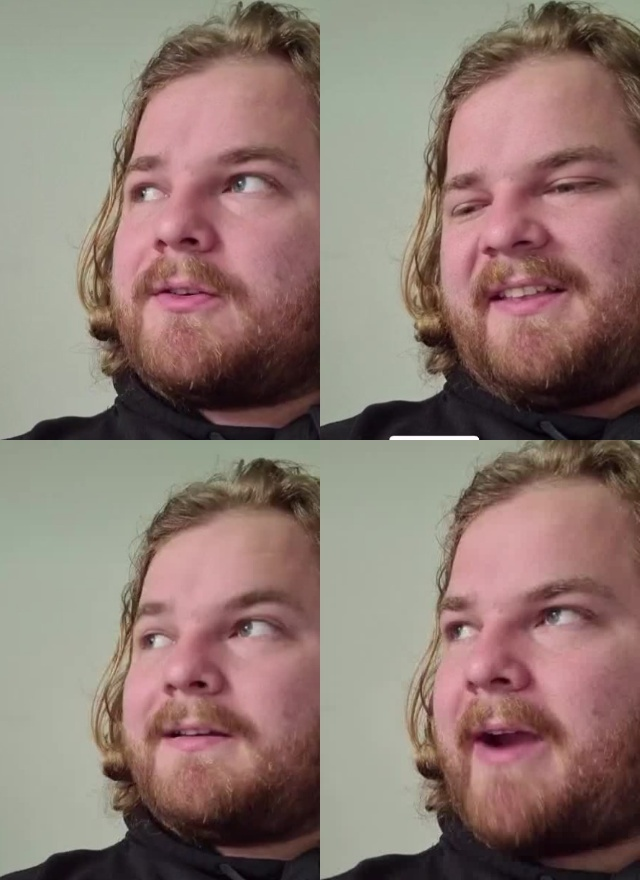
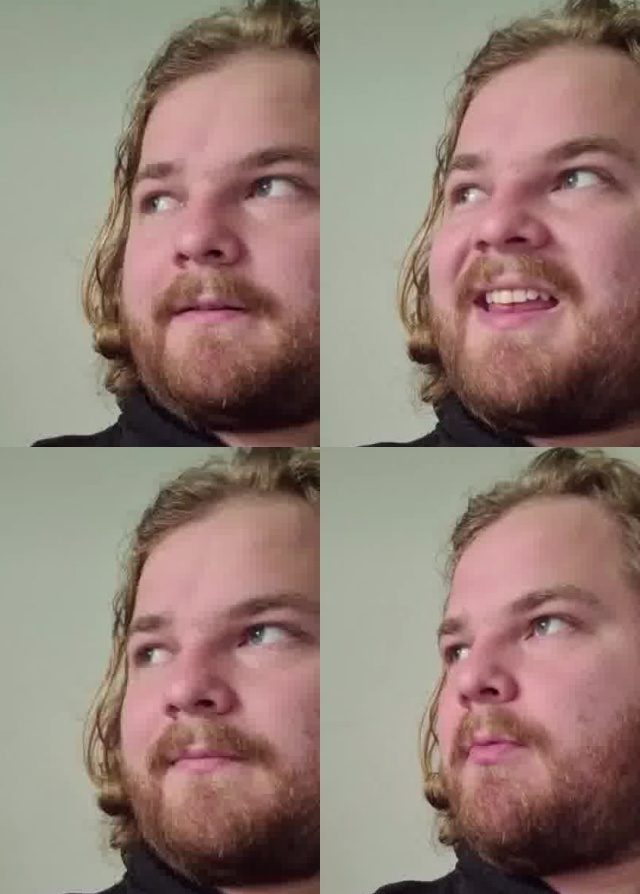
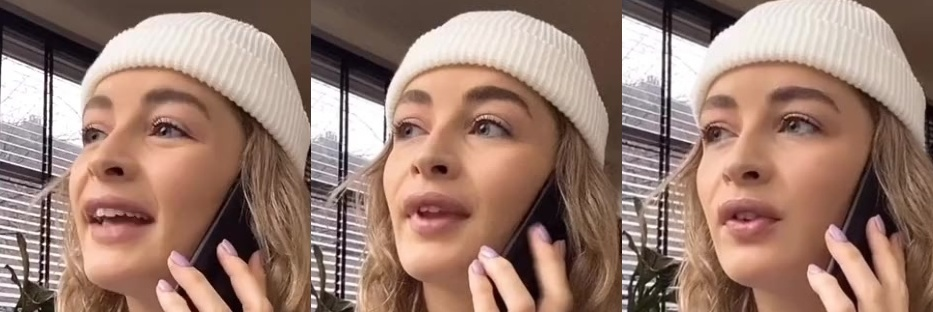
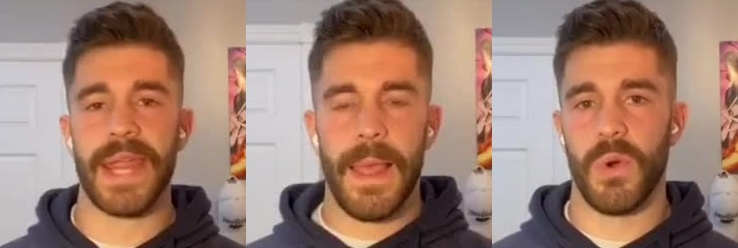
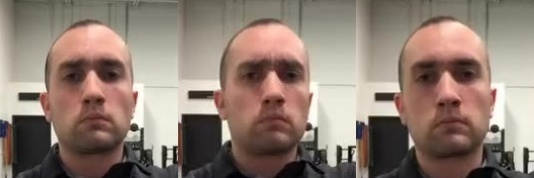
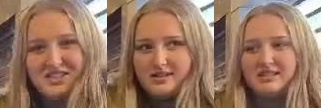
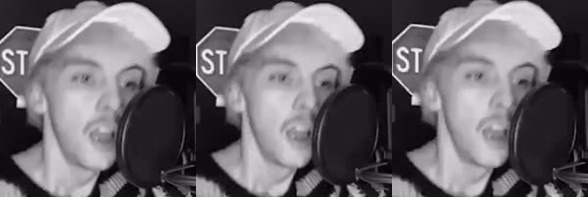
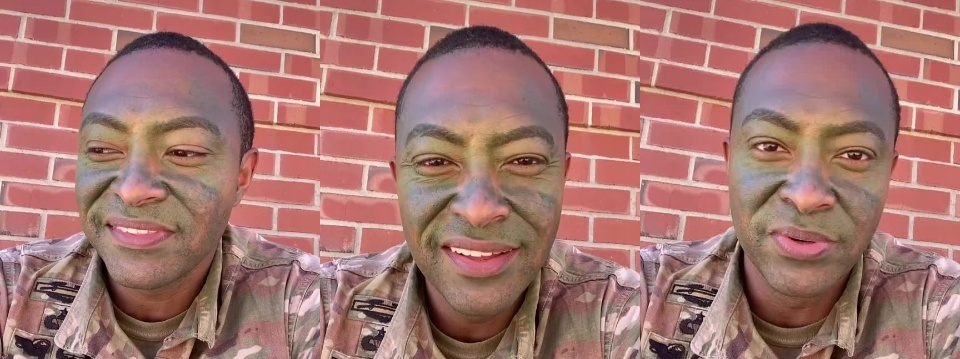
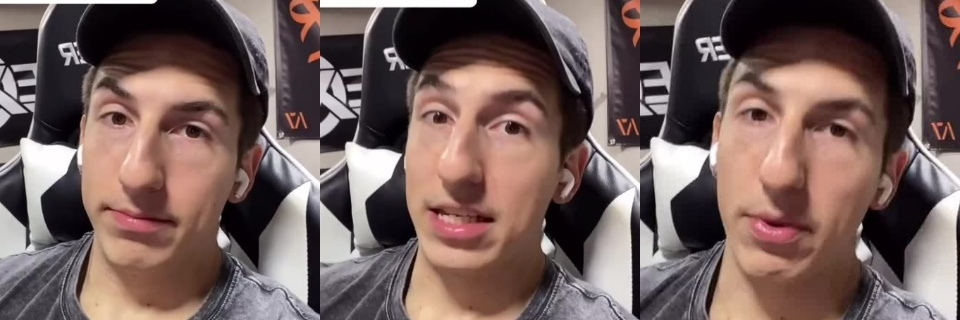
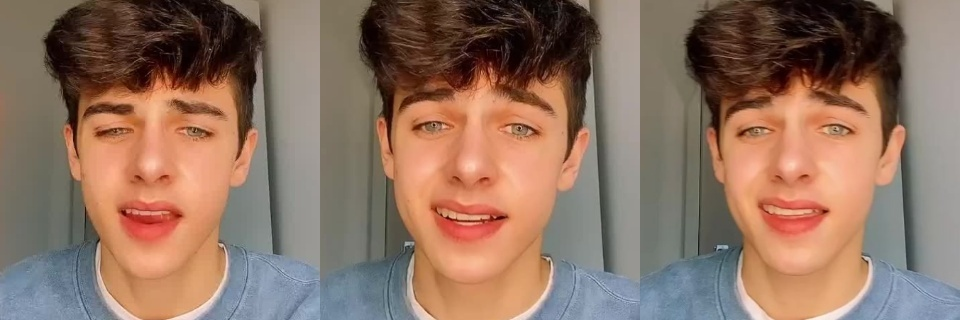
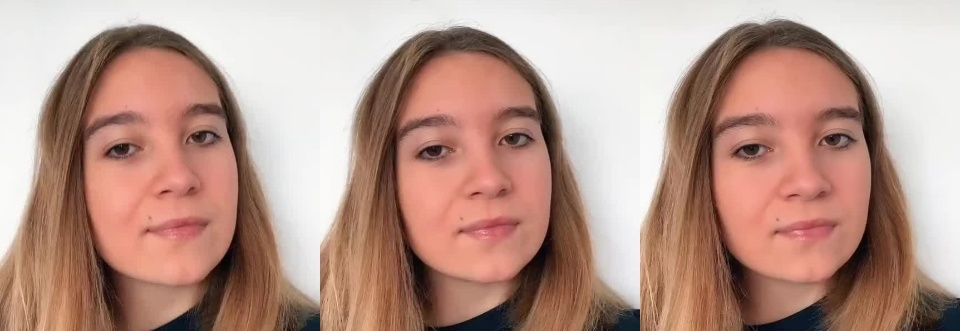
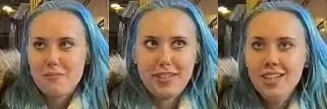
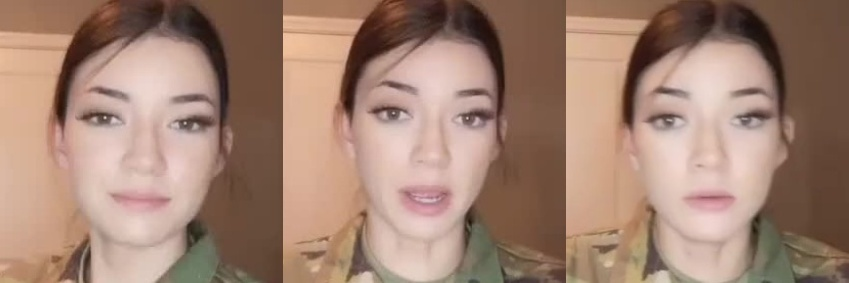

0

In [6]:
fd.vis.component_gallery(draw_bbox=True)

If you'd like to view just the cropped bounding box images, specify `draw_bbox=False`

100%|████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 96.57it/s]


Finished OK. Components are stored as image files work_dir/galleries/components_[index].jpg
Stored components visual view in  work_dir/galleries/components.html
Execution time in seconds 0.5



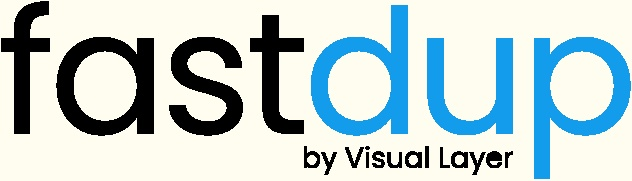
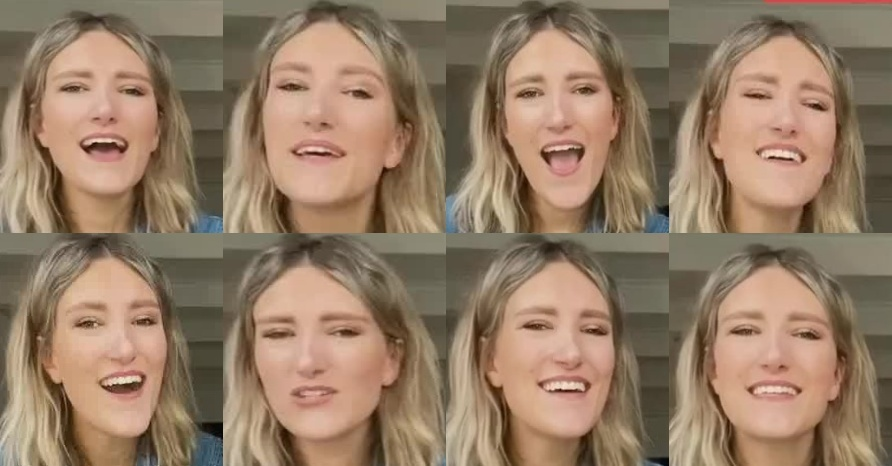
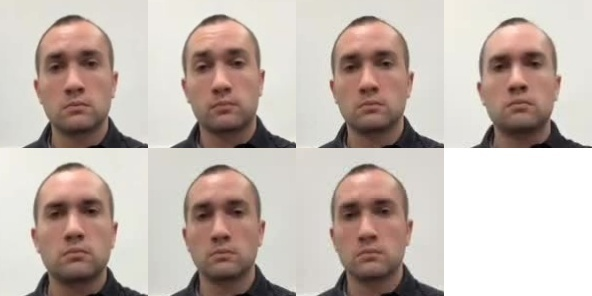
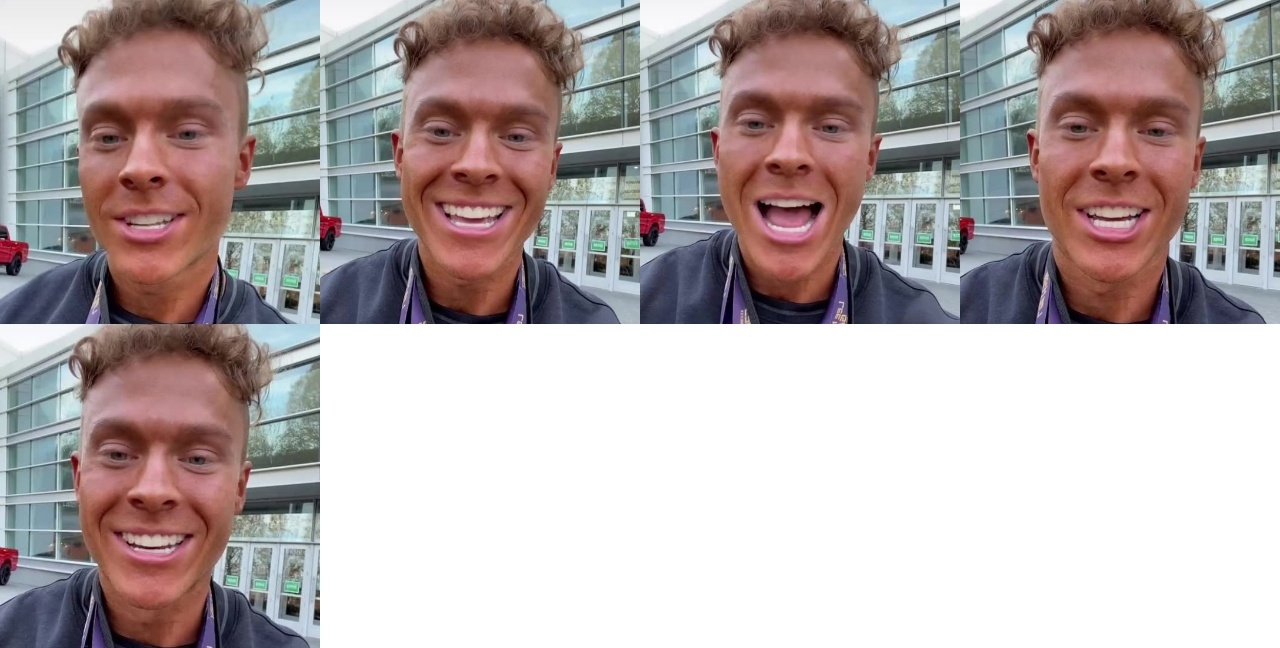
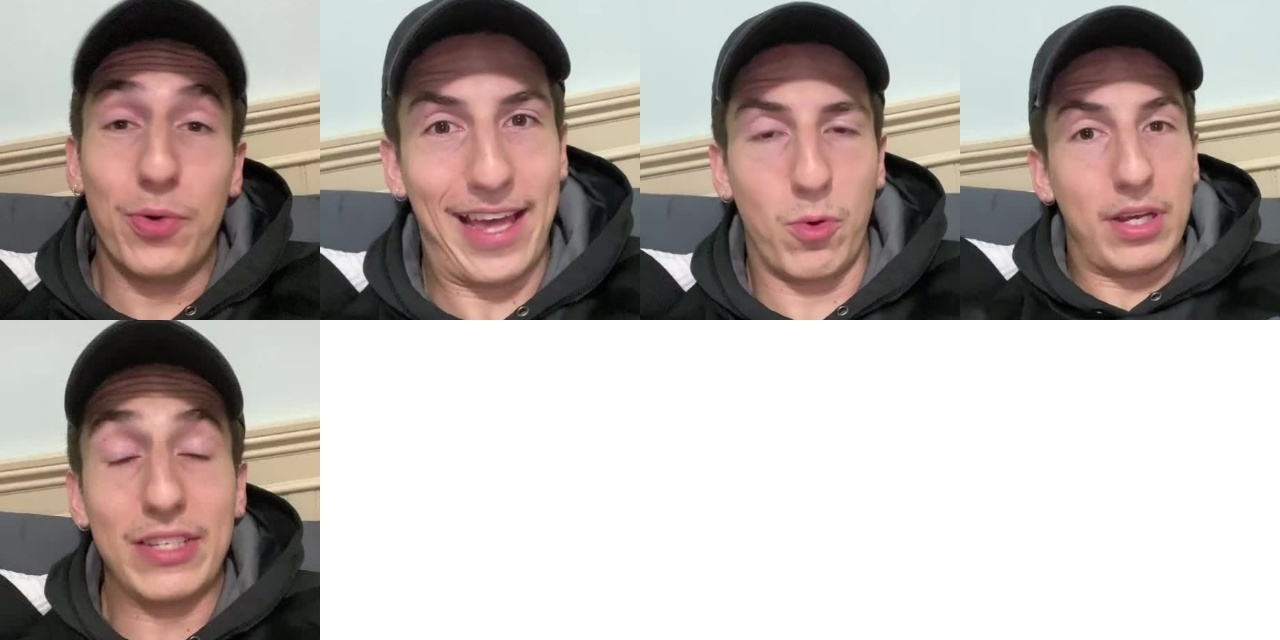
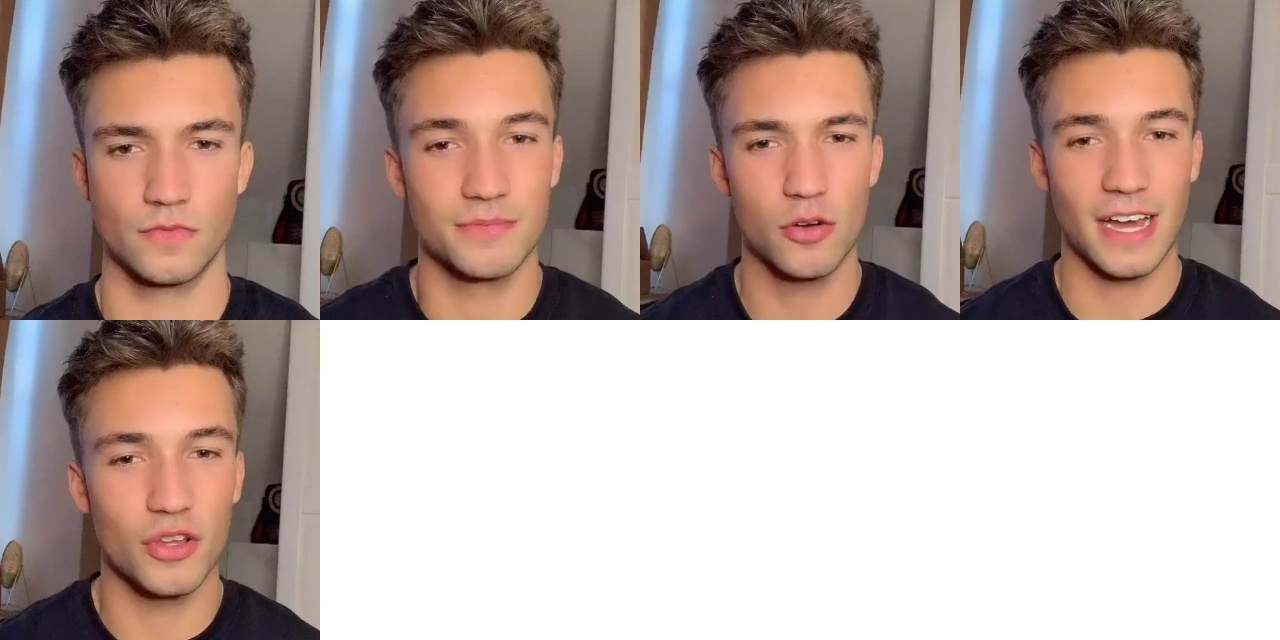
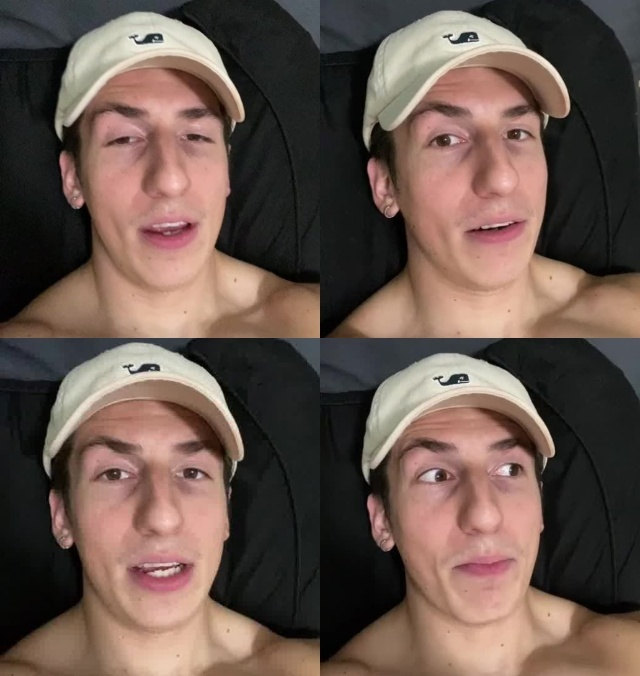
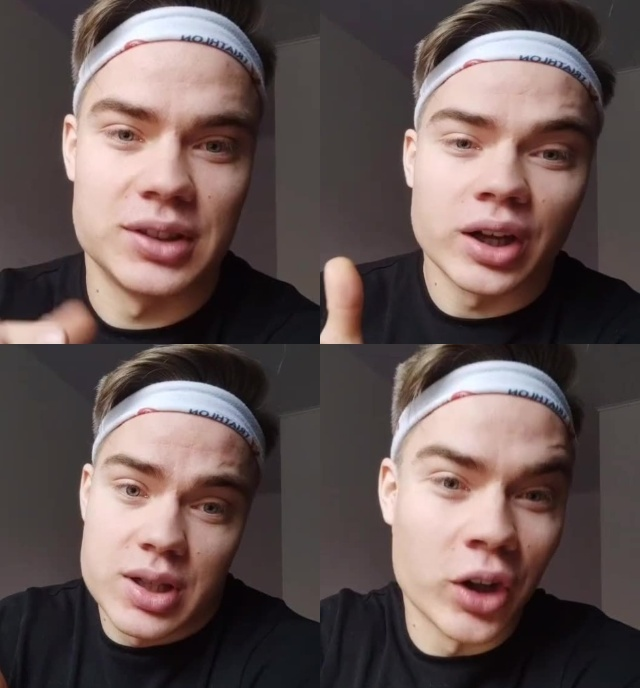
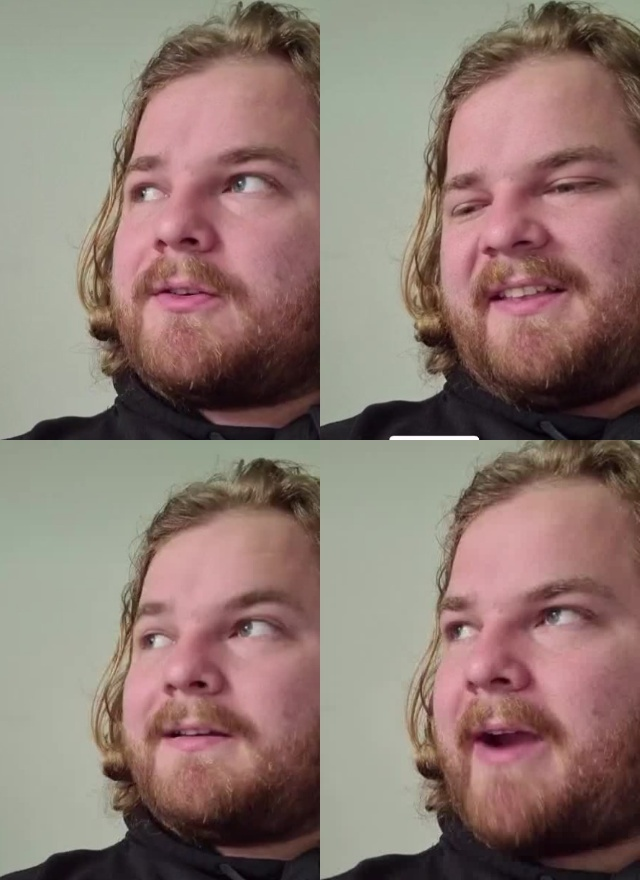
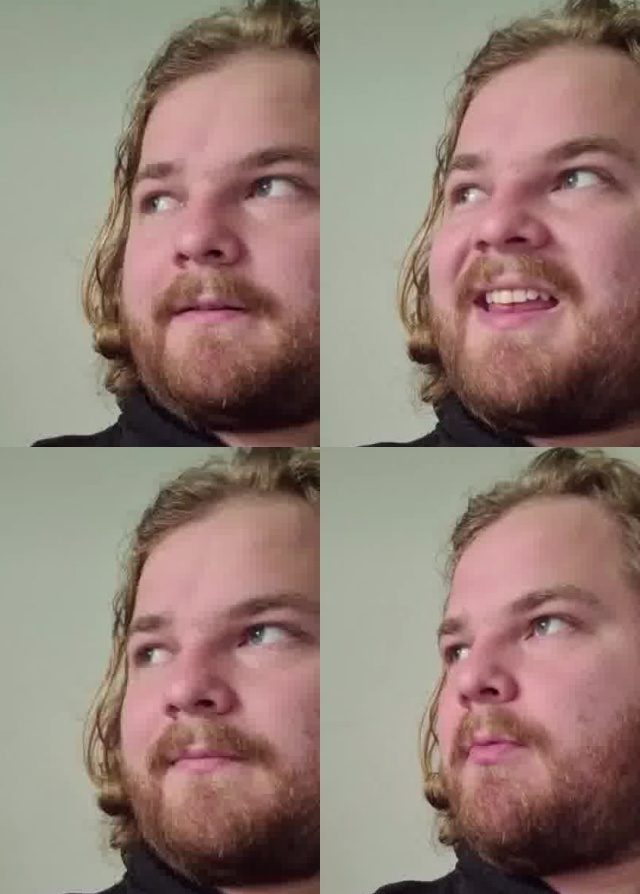
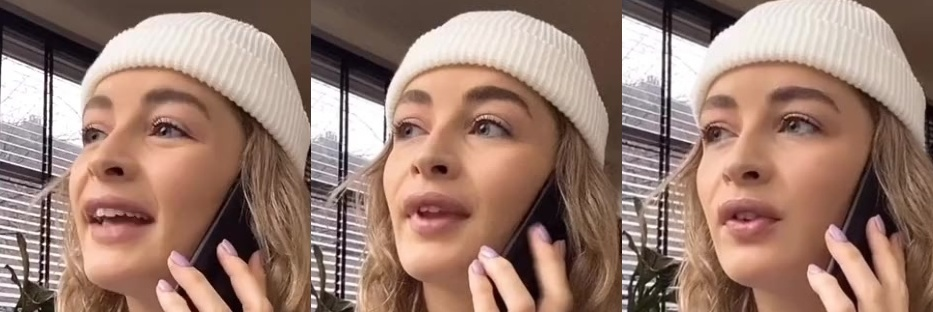
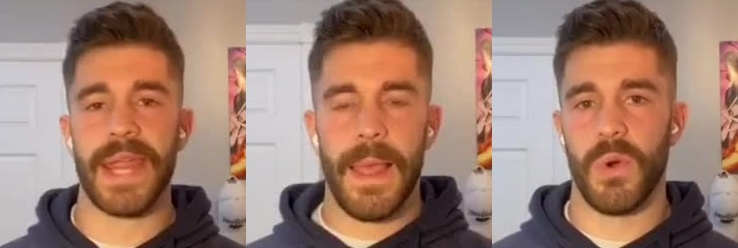
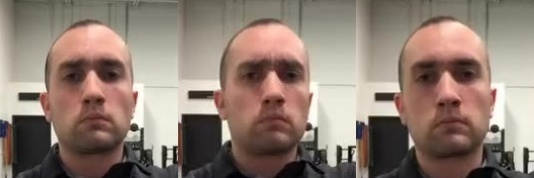
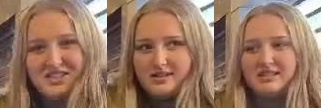
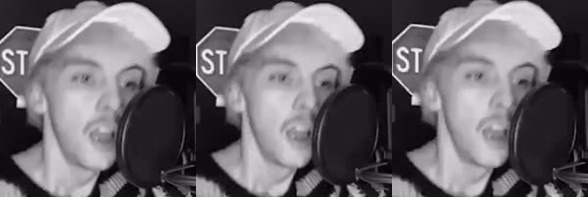
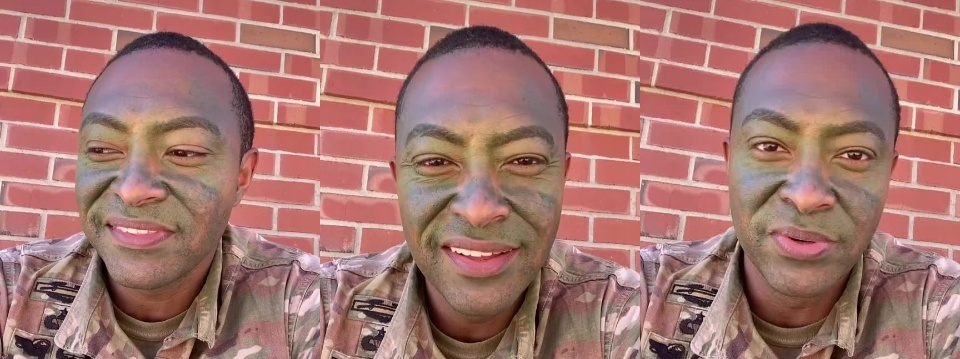
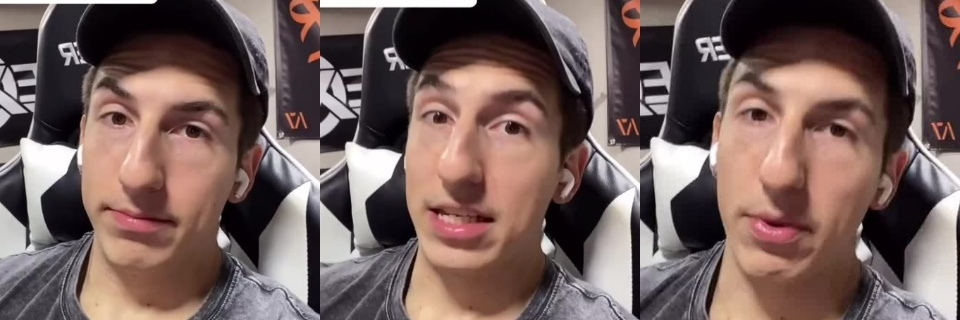
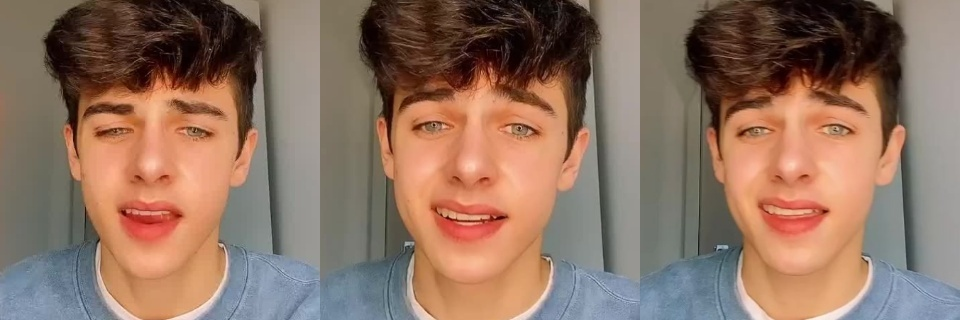
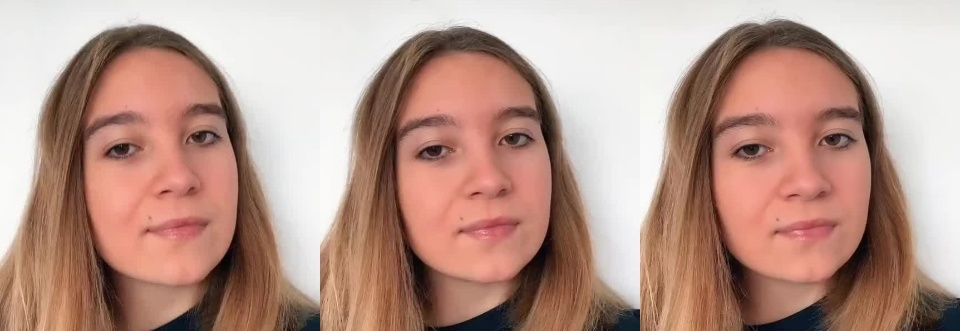
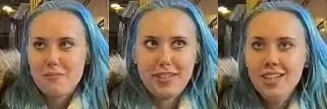
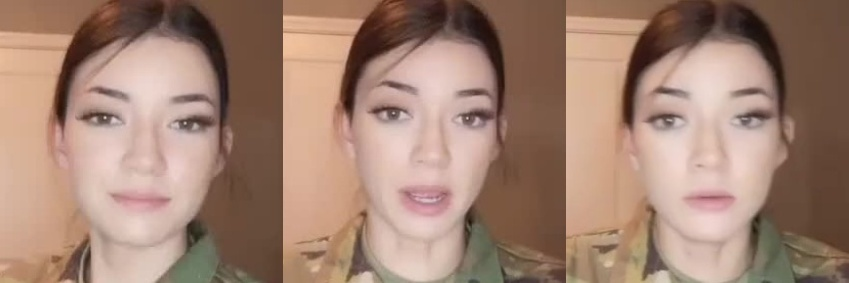

0

In [7]:
fd.vis.component_gallery(draw_bbox=False)

## Find Similar Faces Across Videos

Using the `similarity_gallery` view, we can find similar looking faces (bounding boxes) across all the extracted frames.

100%|███████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 159.94it/s]

Stored similar images visual view in  work_dir/galleries/similarity.html



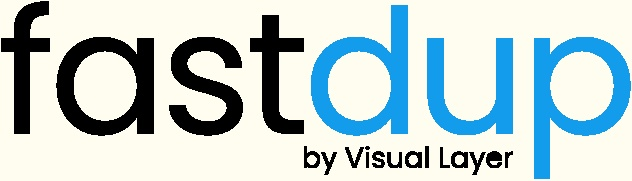
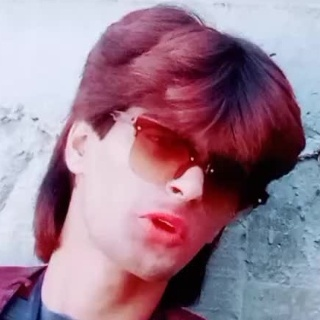
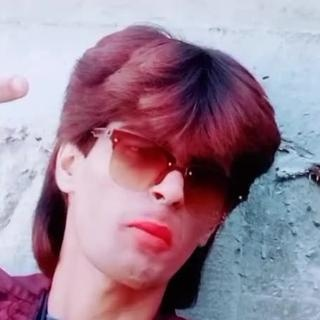
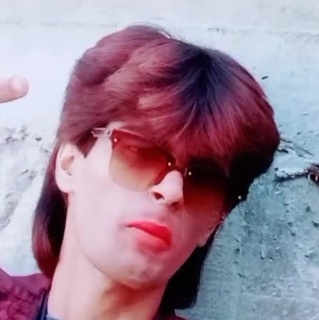
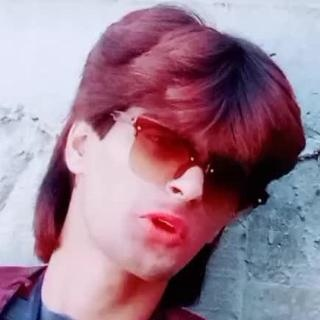
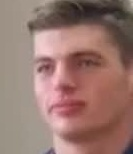
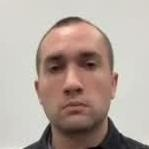
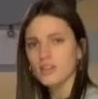
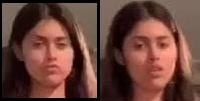
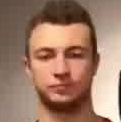
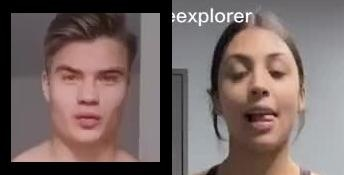
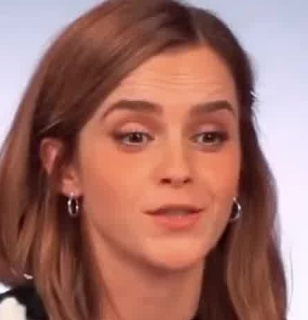
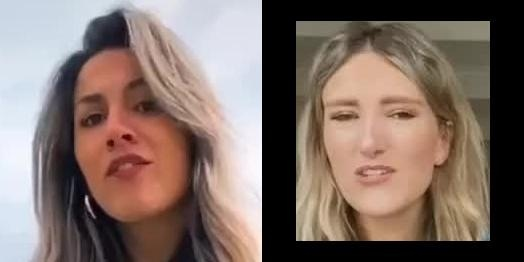
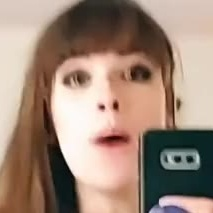
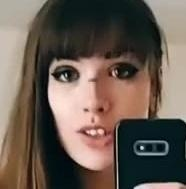
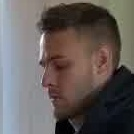
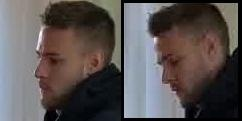
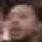
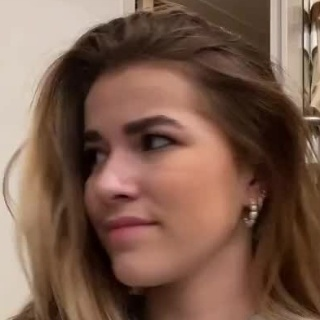
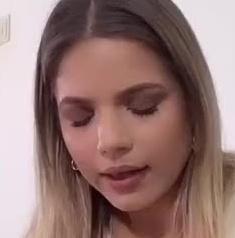
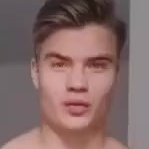
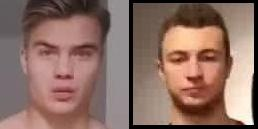
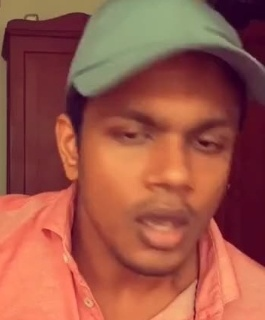
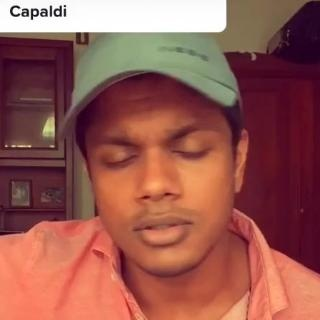
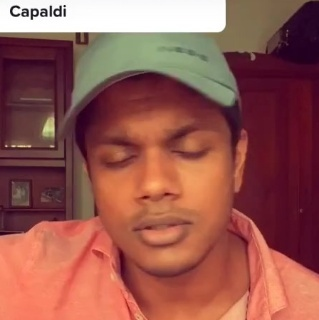
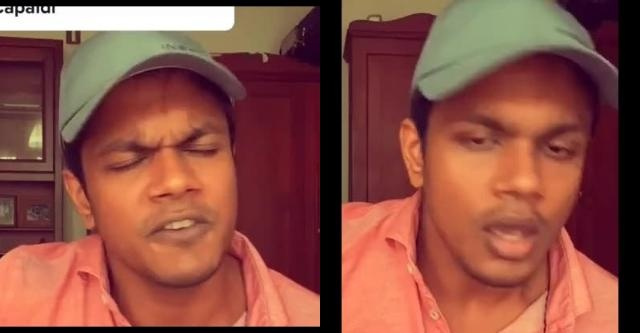
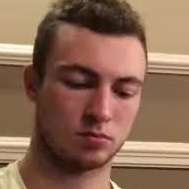
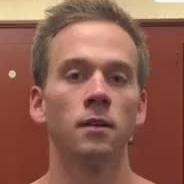
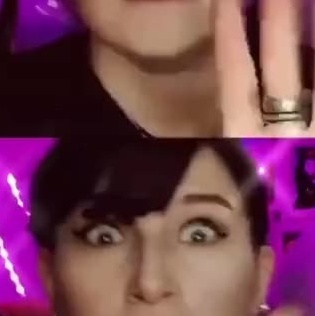
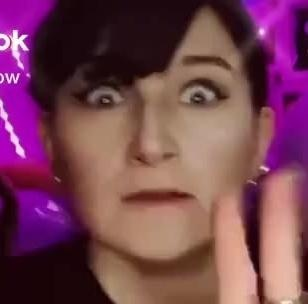
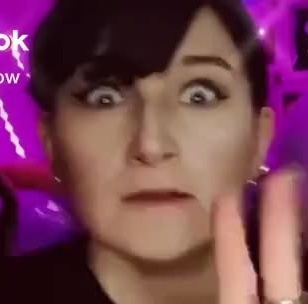
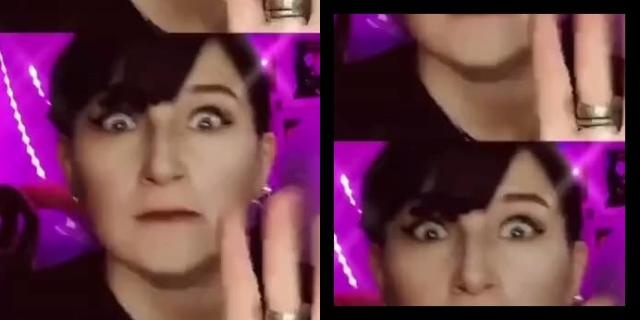
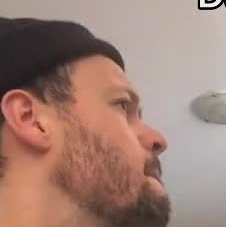
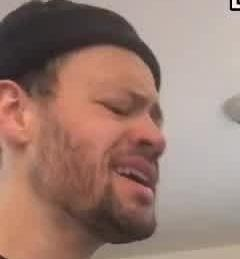
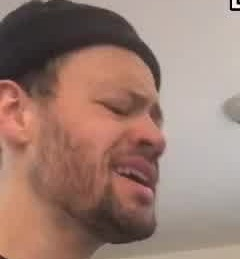
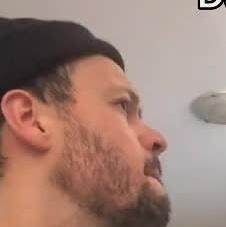

from                                                                                                                                                                                               to              distance
445  work_dir/crops/framestmpdatavideos6893028172024139009.mp4output_000001.jpg_108_226_314_314.jpg                                                                                                 [work_dir/crops/framestmpdatavideos6893028172024139009.mp4output_000002.jpg_104_193_328_329.jpg]            [0.900107]
446  work_dir/crops/framestmpdatavideos6893028172024139009.mp4output_000002.jpg_104_193_328_329.jpg                                                                                                 [work_dir/crops/framestmpdatavideos6893028172024139009.mp4output_000001.jpg_108_226_314_314.jpg]            [0.900107]
469  work_dir/crops/framestmpdatavideos6894926988453186817.mp4output_000001.jpg_464_363_109_110.jpg                                                                                                  [work_dir/crops/framestmpdatavideos6881624031561354498.mp4output_000006.jpg_87_403_107_107.jpg]            [0.900234]
545    work_dir/crops/framestmpdatavideos6898859679217143046.mp4output_000002.jpg_208_393_70_71.jpg     [work_dir/crops/framestmpdatavideos6900102046876208386.mp4output_000001.jpg_144_325_72_73.jpg, work_dir/crops/framestmpdatavideos6900102046876208386.mp4output_000005.jpg_128_323_69_69.jpg]  [0.900285, 0.914902]
915    work_dir/crops/framestmpdatavideos6907966191059356929.mp4output_000008.jpg_240_283_87_88.jpg  [work_dir/crops/framestmpdatavideos6903969832719453445.mp4output_000001.jpg_182_86_124_125.jpg, work_dir/crops/framestmpdatavideos6879844969687878914.mp4output_000003.jpg_269_312_107_107.jpg]  [0.900293, 0.900746]
..                                                                                              ...                                                                                                                                                                                              ...                   ...
580   work_dir/crops/framestmpdatavideos6900185373540961537.mp4output_000006.jpg_66_276_426_427.jpg   [work_dir/crops/framestmpdatavideos6900185373540961537.mp4output_000007.jpg_85_277_411_412.jpg, work_dir/crops/framestmpdatavideos6900185373540961537.mp4output_000005.jpg_53_256_438_439.jpg]  [0.985127, 0.985668]
182   work_dir/crops/framestmpdatavideos6881624031561354498.mp4output_000006.jpg_87_403_107_107.jpg   [work_dir/crops/framestmpdatavideos6881624031561354498.mp4output_000004.jpg_86_401_109_109.jpg, work_dir/crops/framestmpdatavideos6881624031561354498.mp4output_000005.jpg_88_403_106_107.jpg]   [0.988635, 0.98904]
180   work_dir/crops/framestmpdatavideos6881624031561354498.mp4output_000005.jpg_88_403_106_107.jpg   [work_dir/crops/framestmpdatavideos6881624031561354498.mp4output_000003.jpg_86_403_108_108.jpg, work_dir/crops/framestmpdatavideos6881624031561354498.mp4output_000004.jpg_86_401_109_109.jpg]  [0.989452, 0.991009]
176   work_dir/crops/framestmpdatavideos6881624031561354498.mp4output_000003.jpg_86_403_108_108.jpg   [work_dir/crops/framestmpdatavideos6881624031561354498.mp4output_000005.jpg_88_403_106_107.jpg, work_dir/crops/framestmpdatavideos6881624031561354498.mp4output_000004.jpg_86_401_109_109.jpg]  [0.989452, 0.992416]
178   work_dir/crops/framestmpdatavideos6881624031561354498.mp4output_000004.jpg_86_401_109_109.jpg   [work_dir/crops/framestmpdatavideos6881624031561354498.mp4output_000005.jpg_88_403_106_107.jpg, work_dir/crops/framestmpdatavideos6881624031561354498.mp4output_000003.jpg_86_403_108_108.jpg]  [0.991009, 0.992416]

[950 rows x 3 columns]

In [8]:
fd.vis.similarity_gallery(draw_bbox=False)

## Find Outliers

Useing the `outliers_gallery` we can also viaualize faces (detections) that looks visually different from others.

100%|█████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 36472.21it/s]

Stored outliers visual view in  work_dir/galleries/outliers.html



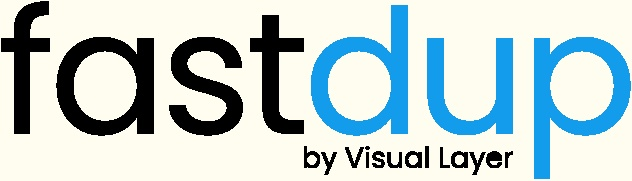
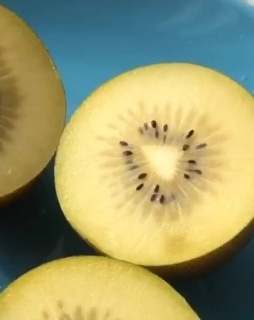
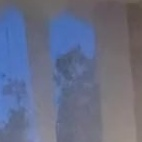
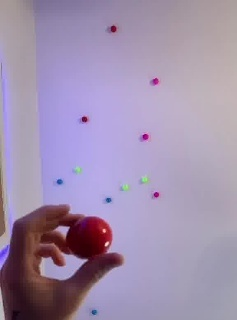
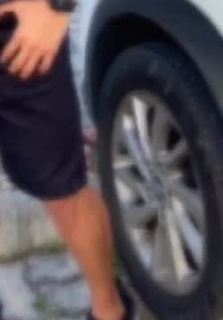
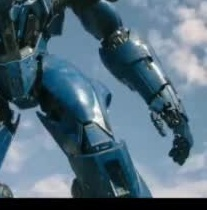
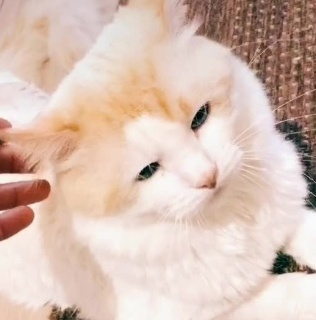
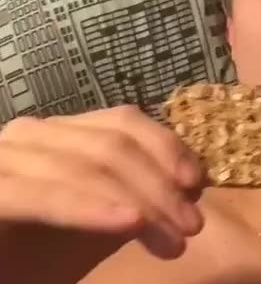
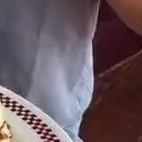
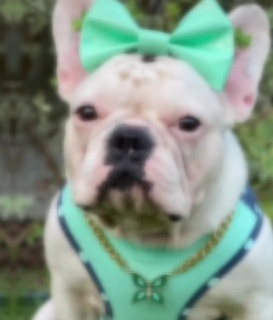
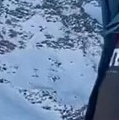
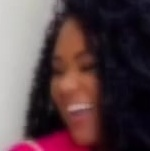
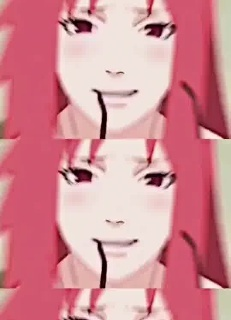
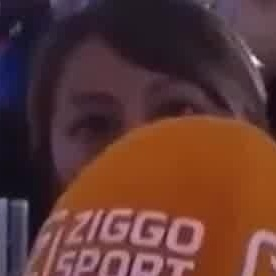
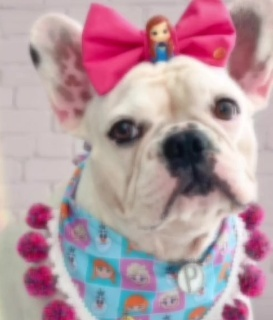
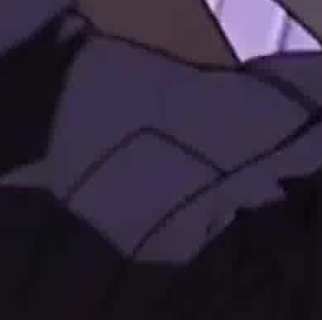
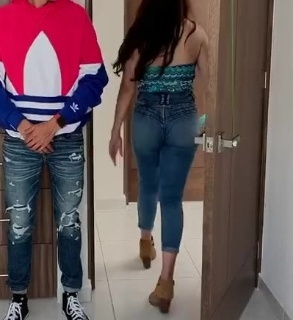
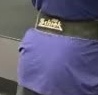
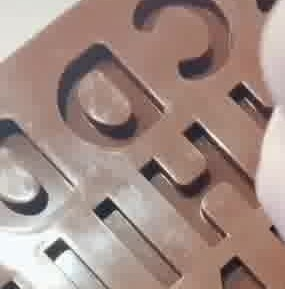
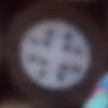
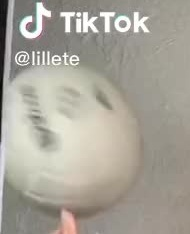

0

In [9]:
fd.vis.outliers_gallery()

## Duplicate Faces

With the `duplicates_gallery` view, visualize duplicate image pairs across videos.

100%|███████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 289.18it/s]


Stored similarity visual view in  work_dir/galleries/duplicates.html



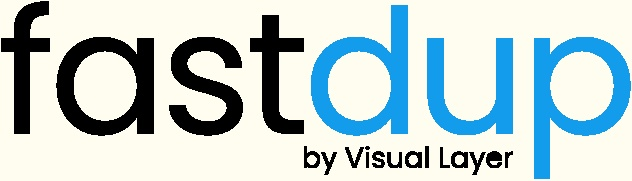
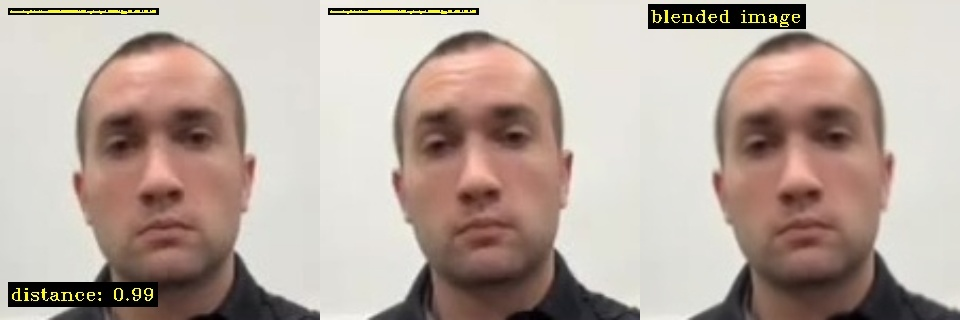
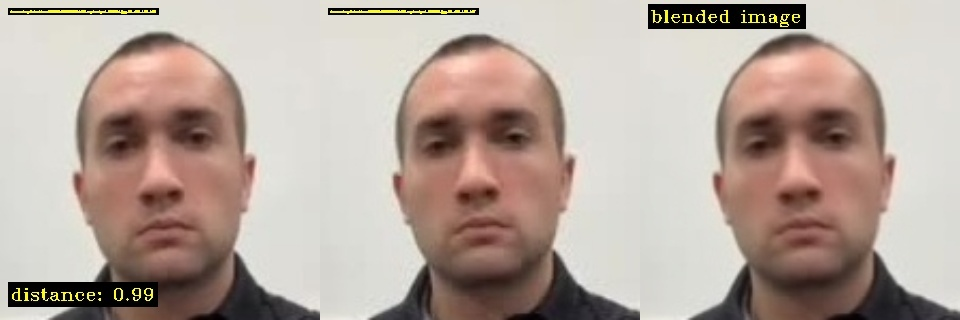
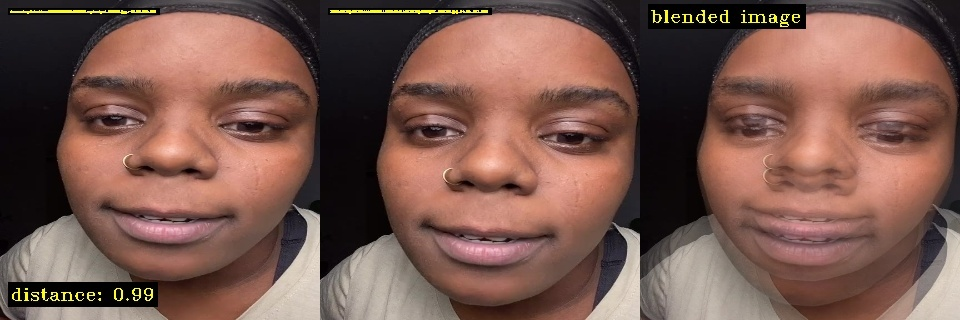
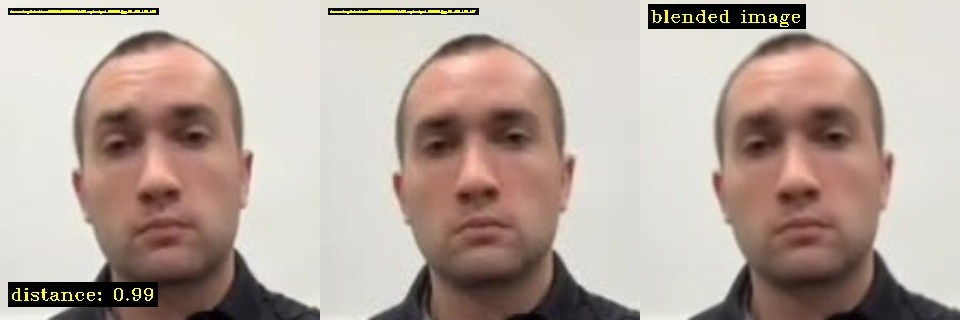
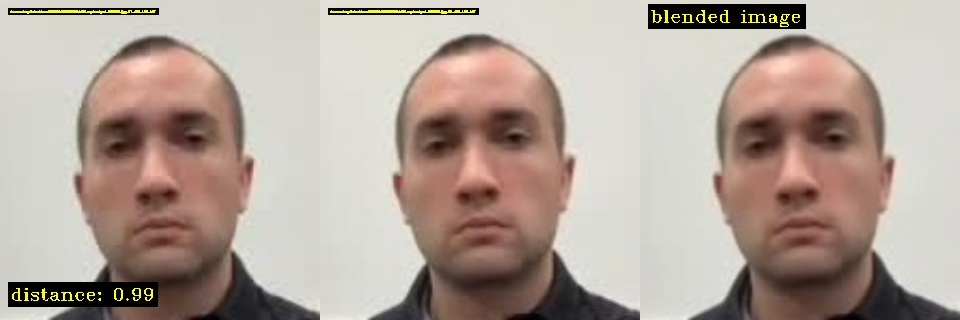
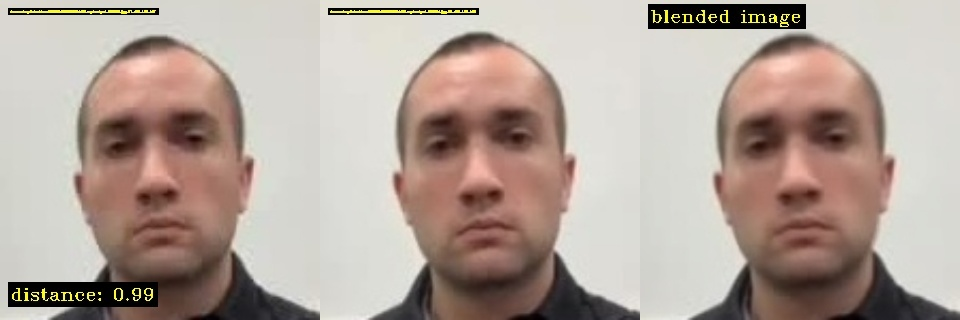
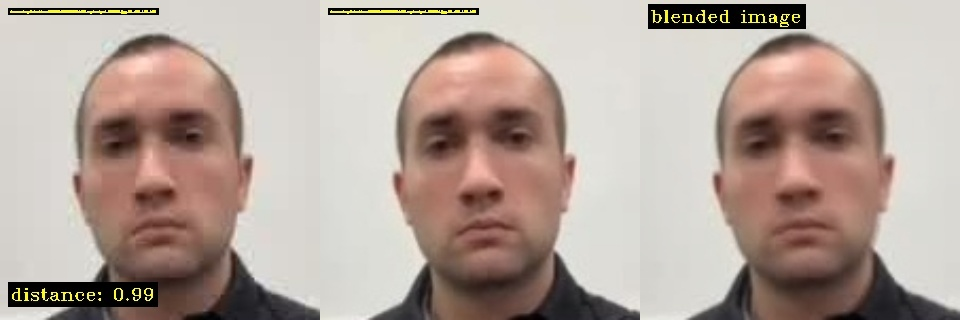
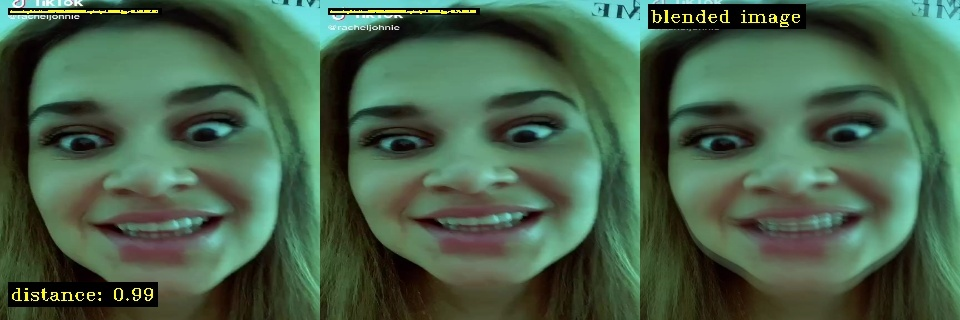
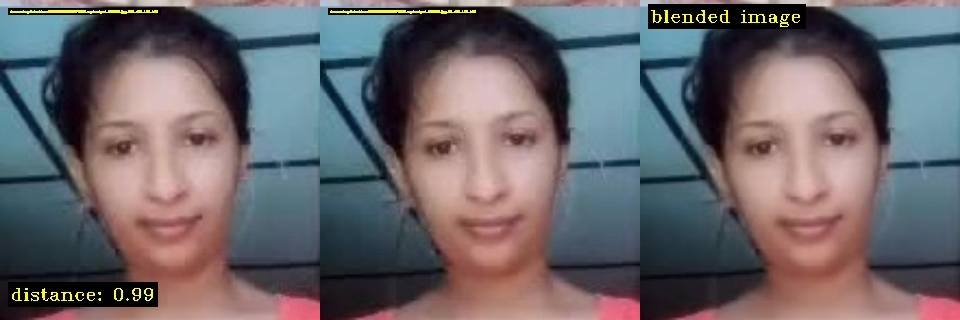
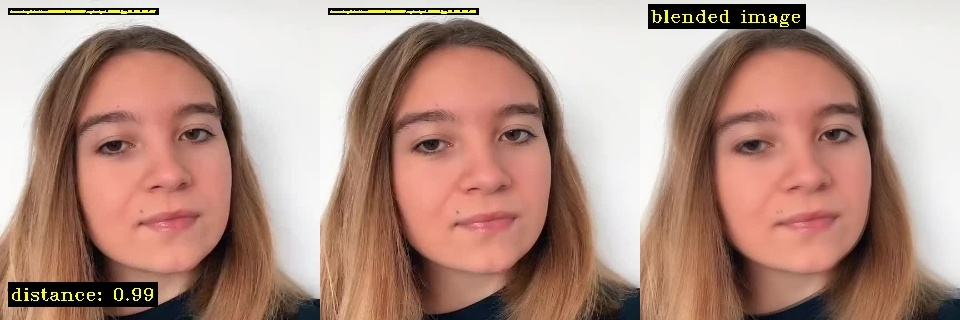
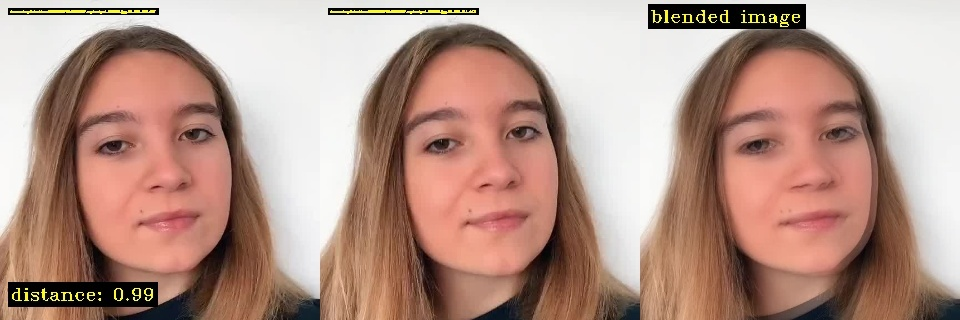
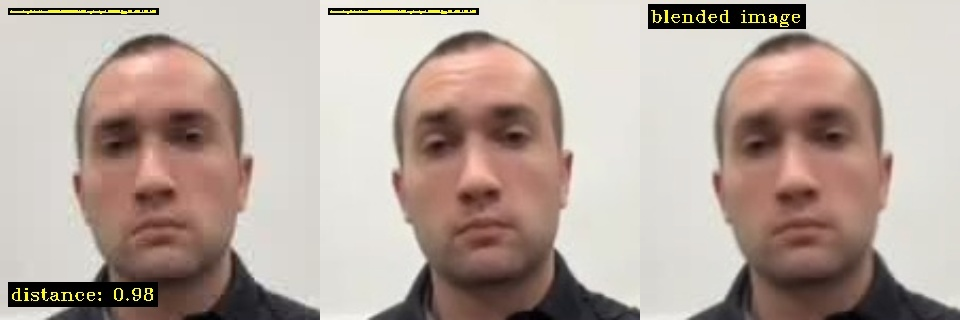

0

In [11]:
fd.vis.duplicates_gallery()

## Dark Faces

Using the `stats_gallery` view, we can sort the faces (detections) following a desired `metric` such as 'dark', 'bright' and 'blur'. 

100%|███████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 915.34it/s]

Stored mean visual view in  work_dir/galleries/mean.html



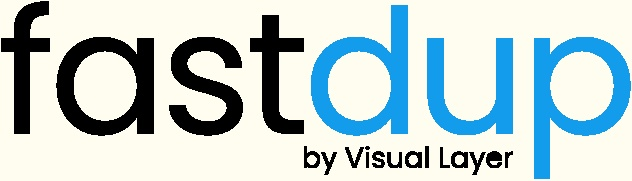
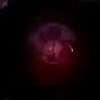
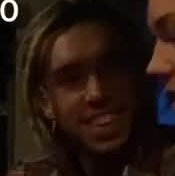
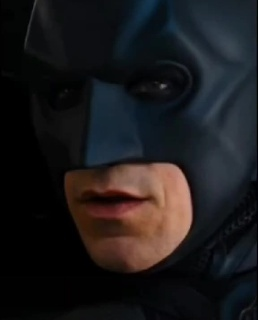
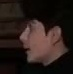
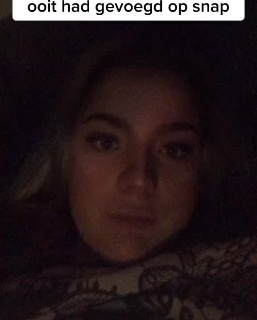
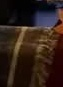
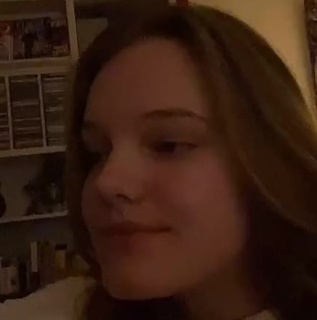
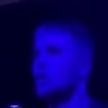
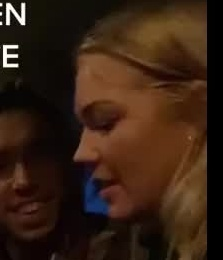
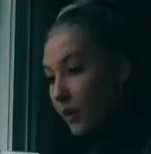
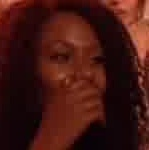
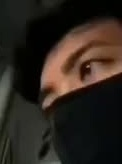
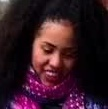
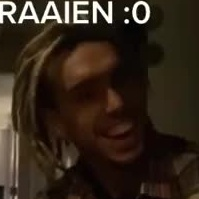
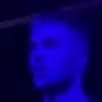
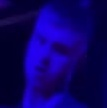
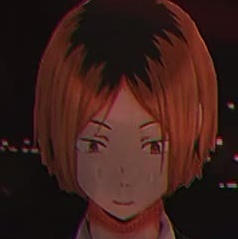
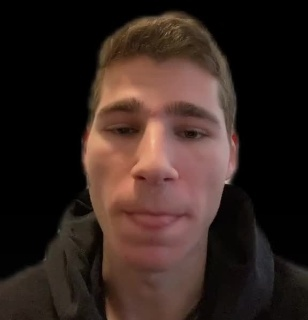
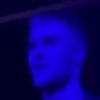
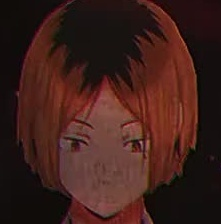

0

In [13]:
fd.vis.stats_gallery(metric='dark')

## Bright Faces

100%|███████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 942.43it/s]

Stored mean visual view in  work_dir/galleries/mean.html



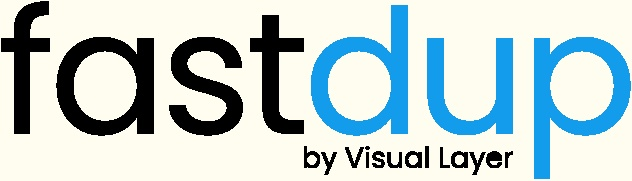
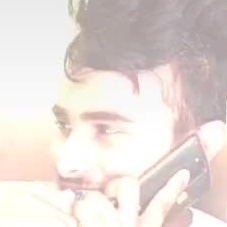
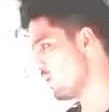
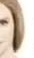
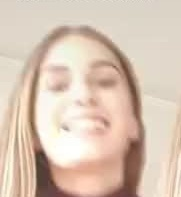
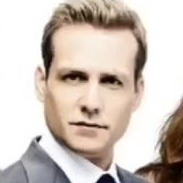
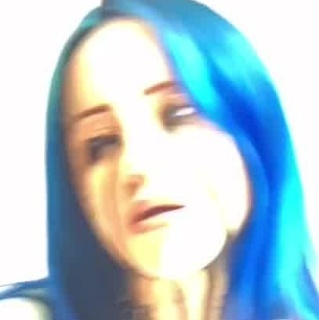
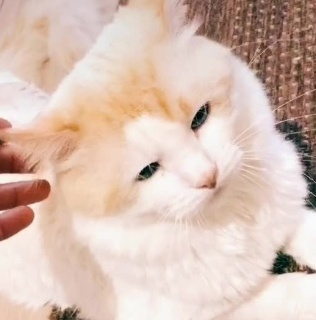
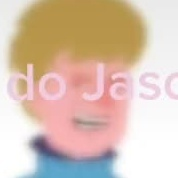
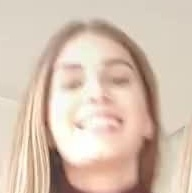
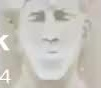
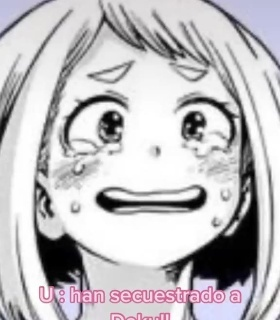
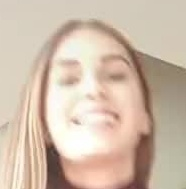
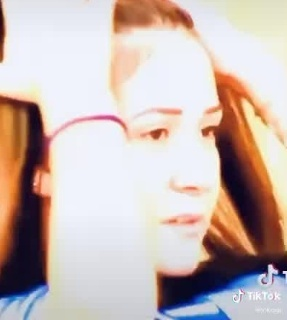
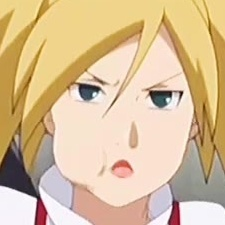
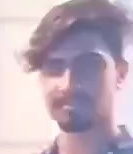
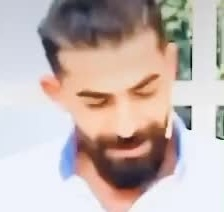
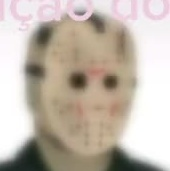
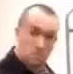
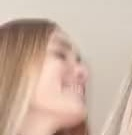
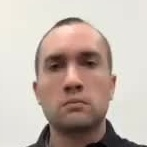

0

In [14]:
fd.vis.stats_gallery(metric='bright')

## Blurry Faces

100%|██████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 1283.90it/s]

Stored blur visual view in  work_dir/galleries/blur.html



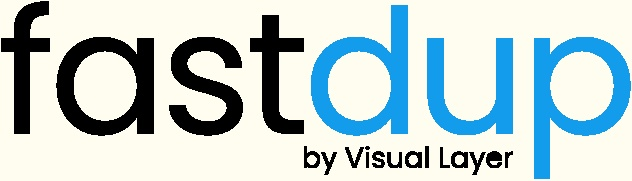
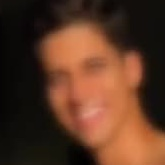
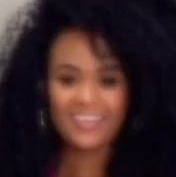
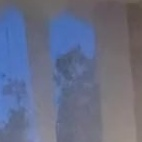
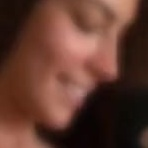
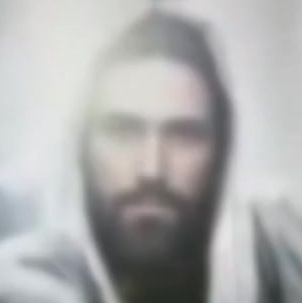
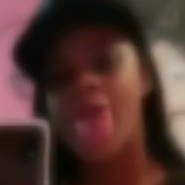
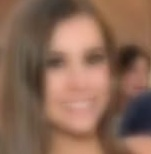
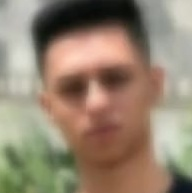
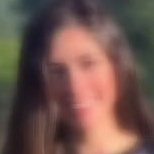
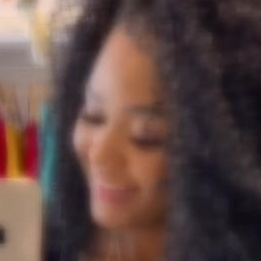
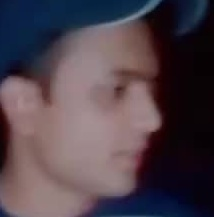
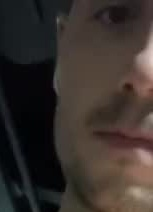
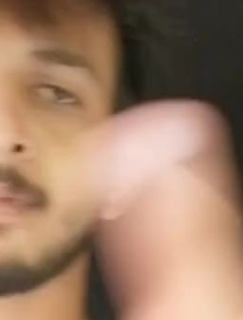
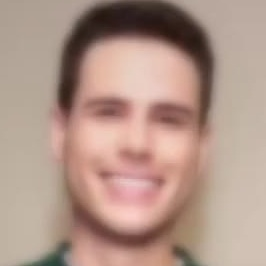
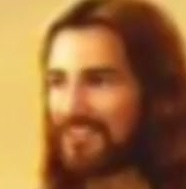
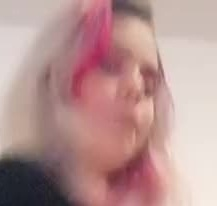
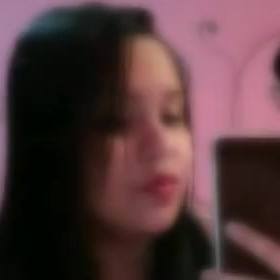
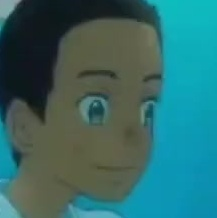
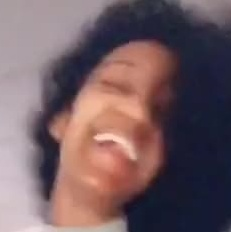

0

In [15]:
fd.vis.stats_gallery(metric='blur')

## Wrap Up

Next, feel free to check out other tutorials -

+ ⚡ [**Quickstart**](https://nbviewer.org/github/visual-layer/fastdup/blob/main/examples/quick-dataset-analysis.ipynb): Learn how to install fastdup, load a dataset and analyze it for potential issues such as duplicates/near-duplicates, broken images, outliers, dark/bright/blurry images, and view visually similar image clusters. If you're new, start here!
+ 🧹 [**Clean Image Folder**](https://nbviewer.org/github/visual-layer/fastdup/blob/main/examples/cleaning-image-dataset.ipynb): Learn how to analyze and clean a folder of images from potential issues and export a list of problematic files for further action. If you have an unorganized folder of images, this is a good place to start.
+ 🖼 [**Analyze Image Classification Dataset**](https://nbviewer.org/github/visual-layer/fastdup/blob/main/examples/analyzing-image-classification-dataset.ipynb): Learn how to load a labeled image classification dataset and analyze for potential issues. If you have labeled ImageNet-style folder structure, have a go!
+ 🎁 [**Analyze Object Detection Dataset**](https://nbviewer.org/github/visual-layer/fastdup/blob/main/examples/analyzing-object-detection-dataset.ipynb): Learn how to load bounding box annotations for object detection and analyze for potential issues. If you have a COCO-style labeled object detection dataset, give this example a try. 



## VL Profiler
If you prefer a no-code platform to inspect and visualize your dataset, [**try our free cloud product VL Profiler**](https://app.visual-layer.com) - VL Profiler is our first no-code commercial product that lets you visualize and inspect your dataset in your browser. 

[Sign up](https://app.visual-layer.com) now, it's free.

[![image](https://raw.githubusercontent.com/visual-layer/fastdup/main/gallery/vl_profiler_promo.svg)](https://app.visual-layer.com)

As usual, feedback is welcome! 

Questions? Drop by our [Slack channel](https://visualdatabase.slack.com/join/shared_invite/zt-19jaydbjn-lNDEDkgvSI1QwbTXSY6dlA#/shared-invite/email) or open an issue on [GitHub](https://github.com/visual-layer/fastdup/issues).